# Problem Statement
# Global Mart is an online supergiant store that has worldwide operations.
# This store takes orders and delivers across the globe and deals with all the major product categories
# — consumer, corporate & home office.


# As a sales manager for this store, you have to forecast the sales and quantity of the products for the next 6 months,
# so that you have an estimate of the demand and the sales of the products in those months and can plan your inventory
#  and business processes accordingly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Step1 : Data prepration and to find out which market segment is
# is highly profitable

### Read the data ,checking the shape , null value and the basis information about the data set

In [2]:
data=pd.read_csv('Global2.csv')
data.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,31-07-2012,Consumer,US,2309.650,7,762.1845
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200


In [3]:
data.shape

(51290, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
Order Date    51290 non-null object
Segment       51290 non-null object
Market        51290 non-null object
Sales         51290 non-null float64
Quantity      51290 non-null int64
Profit        51290 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
data.describe()

,Sales,Quantity,Profit
count,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,28.610982
std,487.565361,2.278766,174.340972
min,0.444000,1.000000,-6599.978000
25%,30.758625,2.000000,0.000000
50%,85.053000,3.000000,9.240000
75%,251.053200,5.000000,36.810000
max,22638.480000,14.000000,8399.976000


### Making a new column name Market Segment

In [6]:
data['Market Segment']=data['Market']+ data['Segment']
data.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Market Segment
0,31-07-2012,Consumer,US,2309.650,7,762.1845,USConsumer
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650,APACCorporate
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710,APACConsumer
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400,EUHome Office
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200,AfricaConsumer


In [7]:
data['Market Segment'].values


array(['USConsumer', 'APACCorporate', 'APACConsumer', ...,
       'USHome Office', 'LATAMHome Office', 'LATAMConsumer'], dtype=object)

### Now we have to check the as per the group by method the Market Segment profitablity

In [8]:
market_seg_mean=data.groupby('Market Segment')['Profit'].mean()
market_seg_mean

Market Segment
APACConsumer         39.097659
APACCorporate        39.517891
APACHome Office      41.309532
AfricaConsumer       20.063880
AfricaCorporate      15.767504
AfricaHome Office    22.832849
CanadaConsumer       47.909406
CanadaCorporate      45.786000
CanadaHome Office    43.100417
EMEAConsumer         10.060116
EMEACorporate         7.941000
EMEAHome Office       6.397233
EUConsumer           36.384055
EUCorporate          40.102041
EUHome Office        34.972973
LATAMConsumer        22.671102
LATAMCorporate       18.956902
LATAMHome Office     22.466216
USConsumer           25.836873
USCorporate          30.456667
USHome Office        33.818664
Name: Profit, dtype: float64

In [9]:
market_seg_std=data.groupby('Market Segment')['Profit'].std()
market_seg_std

Market Segment
APACConsumer         164.472190
APACCorporate        167.212079
APACHome Office      191.403161
AfricaConsumer       147.489712
AfricaCorporate      147.175983
AfricaHome Office    143.027544
CanadaConsumer       100.311080
CanadaCorporate      126.719250
CanadaHome Office    136.860734
EMEAConsumer         145.279173
EMEACorporate        175.006276
EMEAHome Office      139.463057
EUConsumer           171.663016
EUCorporate          191.546678
EUHome Office        172.198483
LATAMConsumer        123.304619
LATAMCorporate       109.751300
LATAMHome Office     119.887165
USConsumer           242.594020
USCorporate          231.986266
USHome Office        212.381482
Name: Profit, dtype: float64

### We have to define the Coefficient of Variation

In [10]:
Cov=market_seg_std/market_seg_mean
Cov

Market Segment
APACConsumer          4.206702
APACCorporate         4.231301
APACHome Office       4.633390
AfricaConsumer        7.351006
AfricaCorporate       9.334133
AfricaHome Office     6.264113
CanadaConsumer        2.093766
CanadaCorporate       2.767642
CanadaHome Office     3.175392
EMEAConsumer         14.441103
EMEACorporate        22.038317
EMEAHome Office      21.800527
EUConsumer            4.718084
EUCorporate           4.776482
EUHome Office         4.923759
LATAMConsumer         5.438845
LATAMCorporate        5.789517
LATAMHome Office      5.336331
USConsumer            9.389450
USCorporate           7.616929
USHome Office         6.280008
Name: Profit, dtype: float64

In [11]:
Cov.min()

2.0937658812377165

### The above value of 2.1 approx CanadaConsumer is having highest no. COV but below if we see CandaConsumer data the data is inconsistance and same with other low COVs such as CanadaCorporate and CanadaHome Office

# Step2 :(Smoothing techniques + ARIMA set of techniques) for the sales forecasts

In [12]:
data_APACConsumer =data[(data['Market Segment']=='APACConsumer')]
data_APACConsumer.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Market Segment
2,17-10-2013,Consumer,APAC,5175.171,9,919.971,APACConsumer
6,07-11-2011,Consumer,APAC,1822.080,4,564.840,APACConsumer
7,14-04-2012,Consumer,APAC,5244.840,6,996.480,APACConsumer
14,06-06-2013,Consumer,APAC,3701.520,12,1036.080,APACConsumer
29,25-02-2012,Consumer,APAC,1878.720,4,582.360,APACConsumer


### Time series analysis

In [13]:
### In the very first step for time series analysis 
data_APACConsumer['Order Date'] = pd.to_datetime(data_APACConsumer['Order Date'],format='%d-%m-%Y')
data_APACConsumer2=data_APACConsumer.sort_values('Order Date',ascending=True)
data_APACConsumer2=data_APACConsumer2.resample('M',on='Order Date').sum()
data_APACConsumer2


,Sales,Quantity,Profit
Order Date,,,
2011-01-31,15711.7125,214,991.2825
2011-02-28,12910.8588,151,1338.8688
2011-03-31,19472.5632,283,3747.1632
2011-04-30,15440.3046,148,3846.4746
2011-05-31,24348.9723,244,3639.9423
2011-06-30,27260.0196,322,4328.2596
2011-07-31,15842.8317,212,1258.9617
2011-08-31,22012.2366,325,775.8066
2011-09-30,34613.1849,391,5181.4449


In [14]:
data_APACConsumer2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-31 to 2014-12-31
Freq: M
Data columns (total 3 columns):
Sales       48 non-null float64
Quantity    48 non-null int64
Profit      48 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


#### Plot time series data

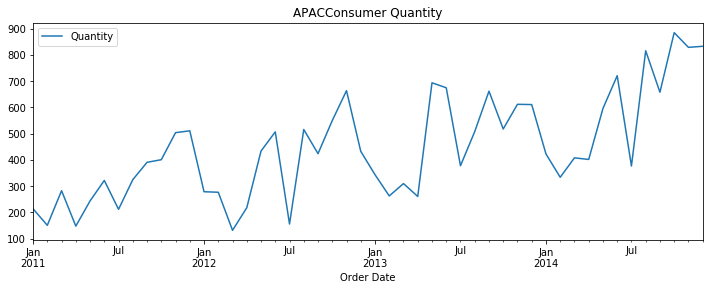

In [15]:
data_APACConsumer2['Quantity'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('APACConsumer Quantity')
plt.show(block=False)

### Missing Value treatment

### Mean imputation

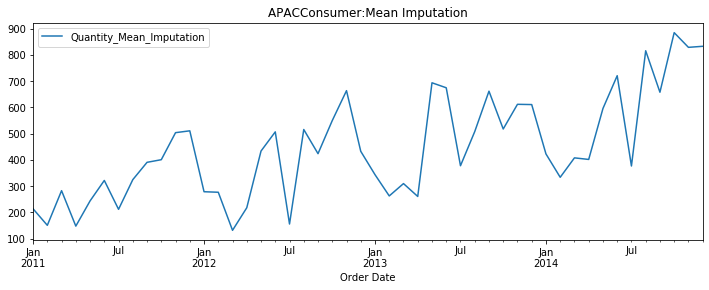

In [16]:
data_APACConsumer2=data_APACConsumer2.assign(Quantity_Mean_Imputation=data_APACConsumer2.Quantity.fillna(data_APACConsumer2.Quantity.mean()))
data_APACConsumer2[['Quantity_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('APACConsumer:Mean Imputation')
plt.show()


In [17]:
data_APACConsumer2

,Sales,Quantity,Profit,Quantity_Mean_Imputation
Order Date,,,,
2011-01-31,15711.7125,214,991.2825,214
2011-02-28,12910.8588,151,1338.8688,151
2011-03-31,19472.5632,283,3747.1632,283
2011-04-30,15440.3046,148,3846.4746,148
2011-05-31,24348.9723,244,3639.9423,244
2011-06-30,27260.0196,322,4328.2596,322
2011-07-31,15842.8317,212,1258.9617,212
2011-08-31,22012.2366,325,775.8066,325
2011-09-30,34613.1849,391,5181.4449,391


### Linear interpolation

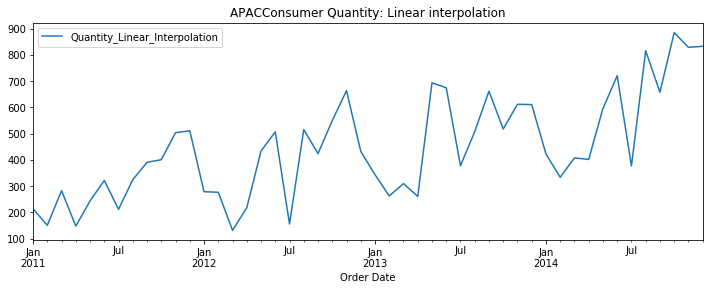

In [18]:
data_APACConsumer2 = data_APACConsumer2.assign(Quantity_Linear_Interpolation=data_APACConsumer2.Quantity.interpolate(method='linear'))
data_APACConsumer2[['Quantity_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APACConsumer Quantity: Linear interpolation')
plt.show(block=False)

### Using Linear interpolation to impute missing value

In [19]:
data_APACConsumer2.head()

,Sales,Quantity,Profit,Quantity_Mean_Imputation,Quantity_Linear_Interpolation
Order Date,,,,,
2011-01-31,15711.7125,214,991.2825,214,214
2011-02-28,12910.8588,151,1338.8688,151,151
2011-03-31,19472.5632,283,3747.1632,283,283
2011-04-30,15440.3046,148,3846.4746,148,148
2011-05-31,24348.9723,244,3639.9423,244,244


### As we are working for Quantity in this file will drop other 4 variables

In [20]:
data_APACConsumer2.drop(columns=['Sales','Profit','Quantity_Mean_Imputation','Quantity_Linear_Interpolation'],inplace=True)
data_APACConsumer2

,Quantity
Order Date,
2011-01-31,214
2011-02-28,151
2011-03-31,283
2011-04-30,148
2011-05-31,244
2011-06-30,322
2011-07-31,212
2011-08-31,325
2011-09-30,391


#### Outlier Detection 

#### Boxplot

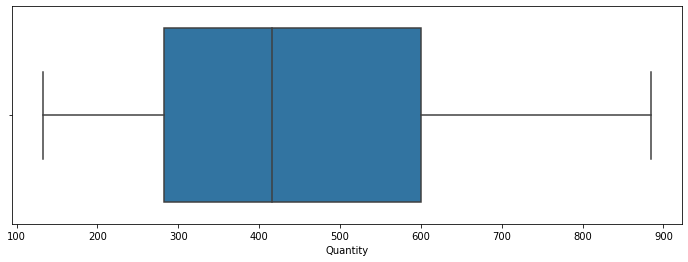

In [21]:
plt.subplots(figsize=(12, 4))
sns.boxplot(data_APACConsumer2['Quantity'],whis=1.5)

#### Histogram plot

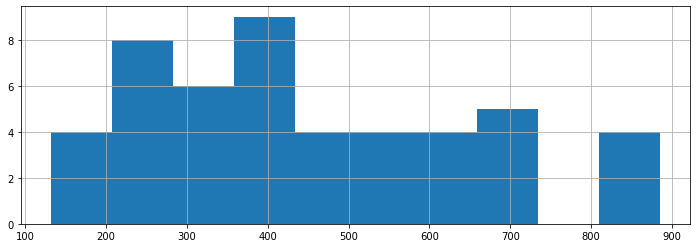

In [22]:
data_APACConsumer2['Quantity'].hist(figsize=(12,4))

### Time series Decomposition

### Additive seasonal decomposition

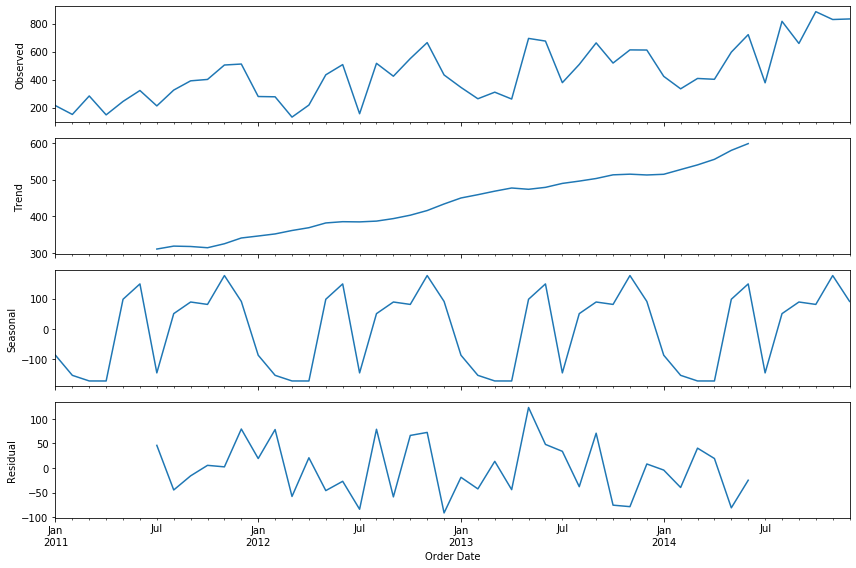

In [23]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data_APACConsumer2.Quantity, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

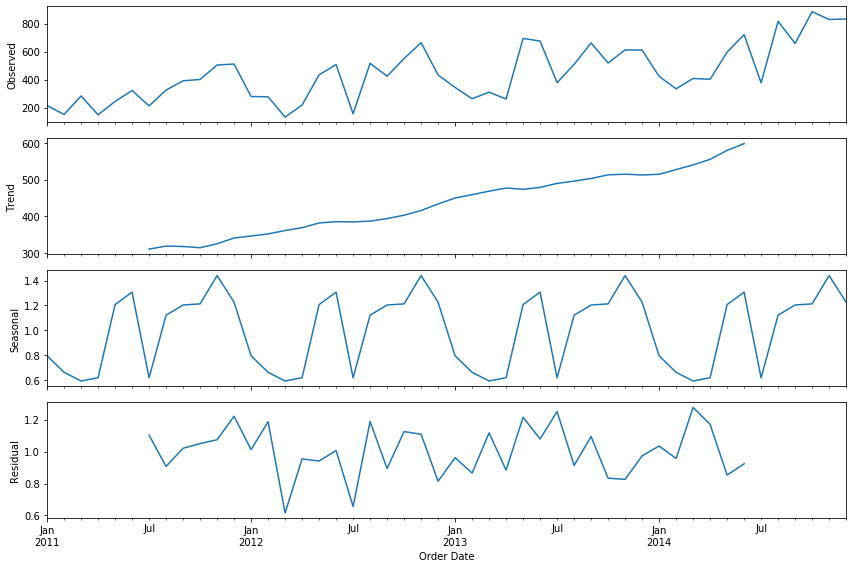

In [24]:
decomposition = sm.tsa.seasonal_decompose(data_APACConsumer2.Quantity, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [25]:
train_len = 42
train=data_APACConsumer2[0:train_len] # first 42 months as training set
test=data_APACConsumer2[train_len:] # last 6 months as out-of-time test set

### Simple time series methods

### Naive method

In [26]:
y_hat_naive=test.copy()
y_hat_naive['naive_forecast']=train['Quantity'][train_len-1]


### PLot train,test and forecast

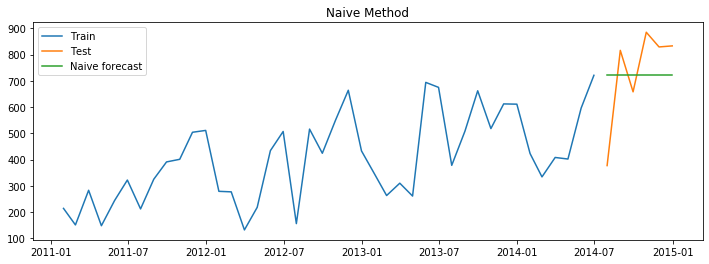

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [28]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_naive['Quantity'])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_naive['naive_forecast'])/test['Quantity'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.0,26.24


### Simple average Method

In [29]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Quantity'].mean()

### Plot train,test and forecast

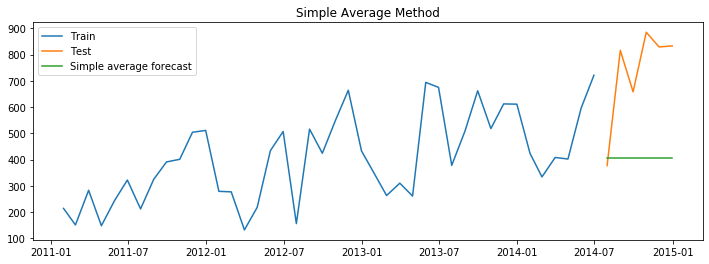

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [31]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_avg['avg_forecast'])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16


### Simple Moving average method

In [32]:
y_hat_sma =data_APACConsumer2.copy()
ma_window =12
y_hat_sma['sma_forecast'] = data_APACConsumer2['Quantity'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train ,test and forecast

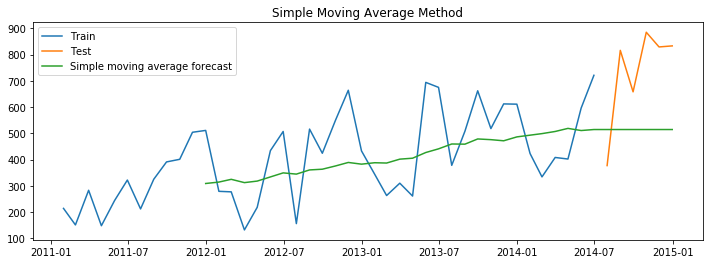

In [33]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()


### Calculate RMSE and MAPE

In [34]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_sma['sma_forecast'][train_len:])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55


### Exponential smoothing methods

### Simple exponential smoothing

In [35]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Quantity'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

### Plot train,test and forecast

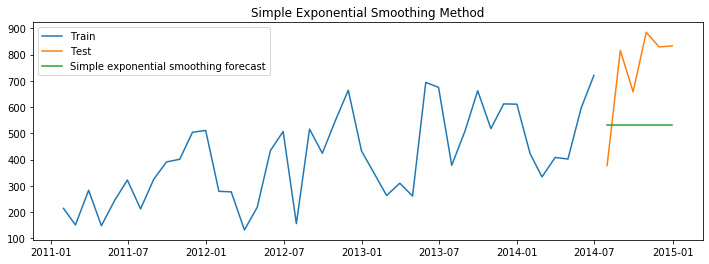

In [36]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calulate RMSE and MAPE

In [37]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_ses['ses_forecast'])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57


### Holt's method with trend

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Quantity']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 214.0, 'initial_slope': -63.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train,test and forecast

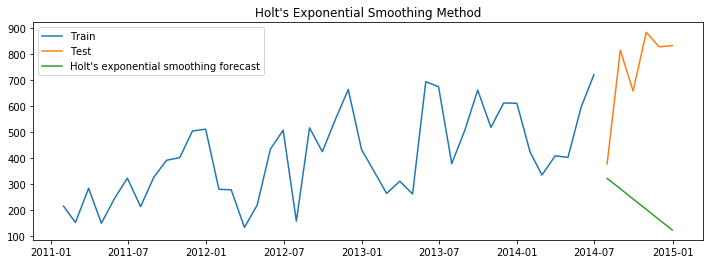

In [39]:
plt.figure(figsize=(12,4))
plt.plot( train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [40]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_holt['holt_forecast'])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44


### Holt's Winter additive method with trend and seasonality

In [41]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Quantity']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.47368421052631576, 'damping_slope': nan, 'initial_level': 315.0, 'initial_slope': 6.138888888888889, 'initial_seasons': array([-101., -164.,  -32., -167.,  -71.,    7., -103.,   10.,   76.,
         86.,  189.,  196.]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train ,test and forecast

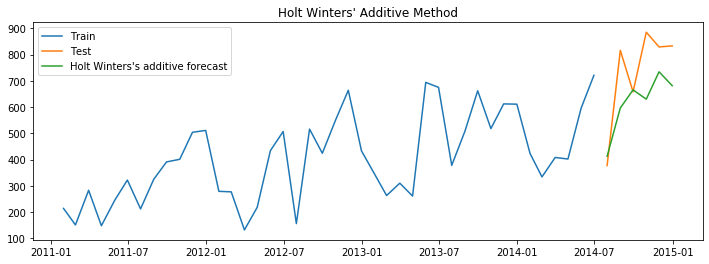

In [42]:
plt.figure(figsize=(12,4))
plt.plot( train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [43]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_hwa['hw_forecast'])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98


### Holt's Winter multiplicative method with trend and seasonality

In [44]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Quantity']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.47368421052631576, 'damping_slope': nan, 'initial_level': 315.0, 'initial_slope': 6.138888888888889, 'initial_seasons': array([0.67936508, 0.47936508, 0.8984127 , 0.46984127, 0.77460317,
       1.02222222, 0.67301587, 1.03174603, 1.24126984, 1.27301587,
       1.6       , 1.62222222]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train,test and forecast



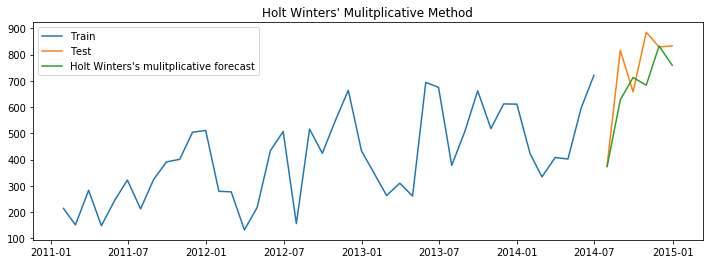

In [45]:
plt.figure(figsize=(12,4))
plt.plot( train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [46]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_hwm['hw_forecast'])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98
0,Holt Winters' multiplicative method,118.69,10.73


# Auto Regressive methods

### Stationarity vs non stationarity time series

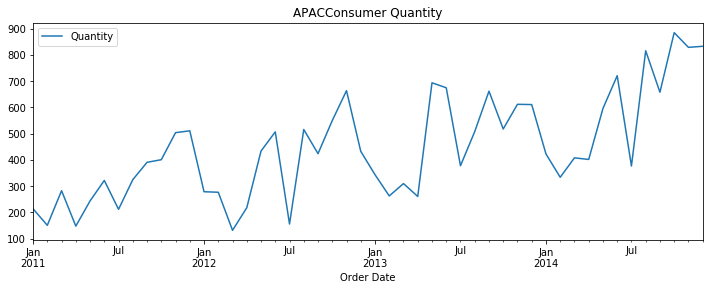

In [47]:
data_APACConsumer2['Quantity'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APACConsumer Quantity')
plt.show(block=False)

### Argumented Dickey Fuller (ADF) Test

In [48]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_APACConsumer2['Quantity'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.293145
Critical Values @ 0.05: -2.94
p-value: 0.977028


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [49]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_APACConsumer2['Quantity'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.593099
Critical Values @ 0.05: 0.46
p-value: 0.023264


### Box Cox transformation to make variance constant

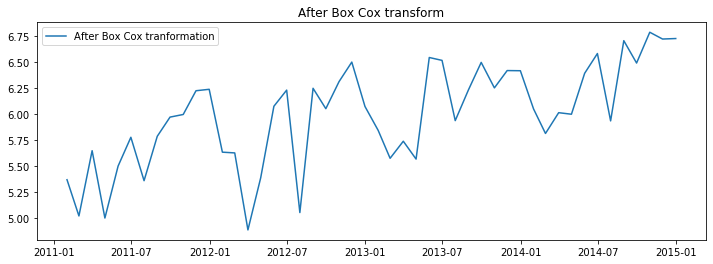

In [50]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data_APACConsumer2['Quantity'], lmbda=0), index = data_APACConsumer2.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

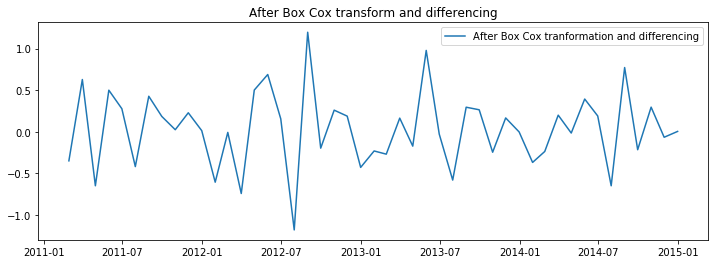

In [51]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_APACConsumer2.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [52]:
data_boxcox_diff.dropna(inplace=True)

In [53]:
data_boxcox_diff.tail()

Order Date
2014-08-31    0.772169
2014-09-30   -0.215209
2014-10-31    0.296383
2014-11-30   -0.065367
2014-12-31    0.004813
Freq: M, dtype: float64

### Augmented Dickey-Fuller (ADF) test


In [54]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.731694
Critical Values @ 0.05: -2.95
p-value: 0.000000


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [55]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.157717
Critical Values @ 0.05: 0.46
p-value: 0.100000


### Autocorrelation function (ACF)

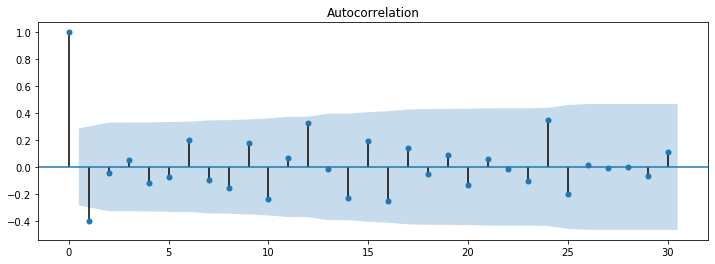

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### Partial autocorrelation function (PACF)

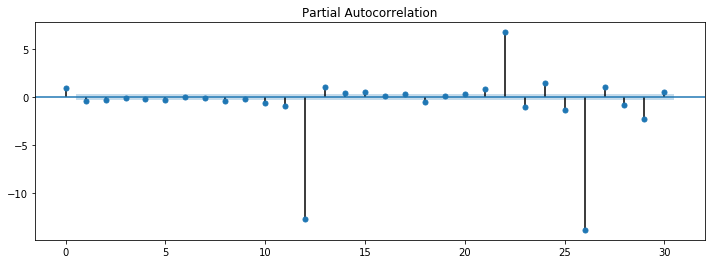

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [58]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [59]:
train_data_boxcox_diff

Order Date
2011-02-28   -0.348696
2011-03-31    0.628167
2011-04-30   -0.648235
2011-05-31    0.499956
2011-06-30    0.277383
2011-07-31   -0.417965
2011-08-31    0.427239
2011-09-30    0.184882
2011-10-31    0.025254
2011-11-30    0.228615
2011-12-31    0.013793
2012-01-31   -0.605158
2012-02-29   -0.007194
2012-03-31   -0.741216
2012-04-30    0.501693
2012-05-31    0.688549
2012-06-30    0.155466
2012-07-31   -1.178655
2012-08-31    1.196251
2012-09-30   -0.196373
2012-10-31    0.260185
2012-11-30    0.188364
2012-12-31   -0.427544
2013-01-31   -0.230096
2013-02-28   -0.268488
2013-03-31    0.164418
2013-04-30   -0.172052
2013-05-31    0.977952
2013-06-30   -0.027759
2013-07-31   -0.579818
2013-08-31    0.295587
2013-09-30    0.264784
2013-10-31   -0.245290
2013-11-30    0.166757
2013-12-31   -0.001635
2014-01-31   -0.367725
2014-02-28   -0.236231
2014-03-31    0.200126
2014-04-30   -0.014815
2014-05-31    0.393789
2014-06-30    0.190398
Freq: M, dtype: float64

### Auto regression method(AR)

In [60]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031031
ar.L1.y   -0.354124
dtype: float64


### Recove of the original series

In [61]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train,test and forecast

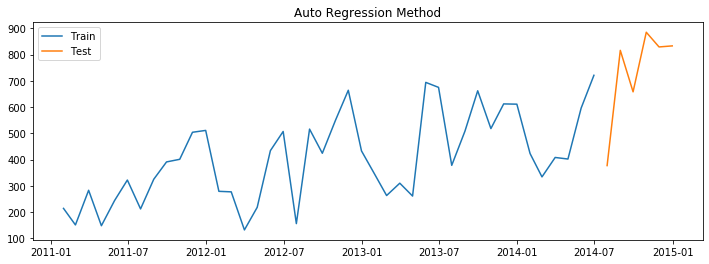

In [62]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.legend(loc='best')

plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [63]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_ar['ar_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98
0,Holt Winters' multiplicative method,118.69,10.73
0,Autoregressive (AR) method,204.28,29.30


### Moving average method(MA)

In [64]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022029
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [65]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train,test and forecast

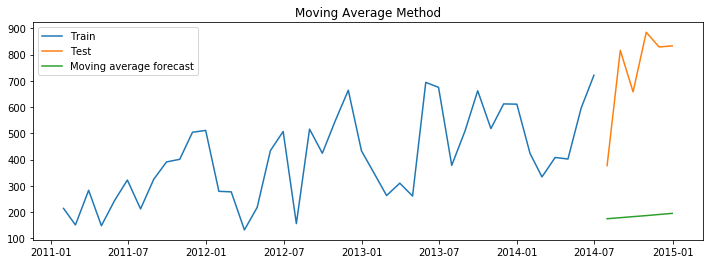

In [66]:
plt.figure(figsize=(12,4))
plt.plot(data_APACConsumer2['Quantity'][:train_len], label='Train')
plt.plot(data_APACConsumer2['Quantity'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [67]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_ma['ma_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98
0,Holt Winters' multiplicative method,118.69,10.73
0,Autoregressive (AR) method,204.28,29.30
0,Moving Average (MA) method,573.80,72.76


### Auto regression moving average method (ARMA)

In [68]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022378
ar.L1.y    0.249096
ma.L1.y   -0.999998
dtype: float64


### Recover original time Series

In [69]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train,test and forecast

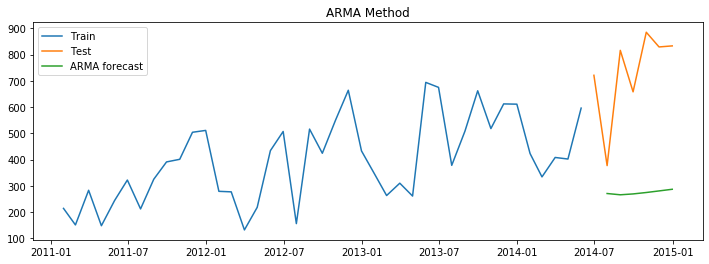

In [70]:
plt.figure(figsize=(12,4))
plt.plot( data_APACConsumer2['Quantity'][:train_len-1], label='Train')
plt.plot(data_APACConsumer2['Quantity'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [71]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_arma['arma_forecast'][train_len-1:])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98
0,Holt Winters' multiplicative method,118.69,10.73
0,Autoregressive (AR) method,204.28,29.30
0,Moving Average (MA) method,573.80,72.76
0,Autoregressive moving average (ARMA) method,489.40,59.24


### Auto regressive integrated moving average (ARIMA)

In [72]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022378
ar.L1.D.y    0.249096
ma.L1.D.y   -0.999998
dtype: float64


### Recover original time series forecast

In [73]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train,test and forecast

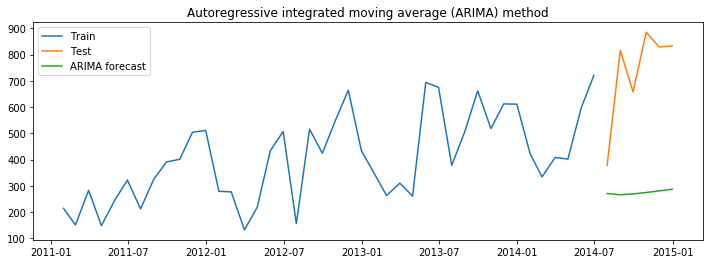

In [74]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()


### Calculate RMSE and MAPE

In [75]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_arima['arima_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98
0,Holt Winters' multiplicative method,118.69,10.73
0,Autoregressive (AR) method,204.28,29.30
0,Moving Average (MA) method,573.80,72.76
0,Autoregressive moving average (ARMA) method,489.40,59.24


### Seasonal auto regressive integrated moving average (SARIMA)

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      0.239946
ma.L1     -0.997244
ar.S.L5   -0.122360
ma.S.L5   -0.998216
sigma2     0.137274
dtype: float64


### Recover original time series forecast

In [77]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

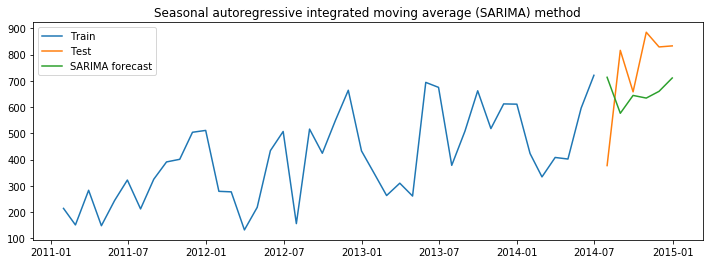

In [78]:
plt.figure(figsize=(12,4))
plt.plot(train['Quantity'], label='Train')
plt.plot(test['Quantity'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [79]:
rmse = np.sqrt(mean_squared_error(test['Quantity'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Quantity']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Quantity'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.00,26.24
0,Simple average method,371.15,42.16
0,Simple moving average forecast,279.36,35.55
0,Simple exponential smoothing forecast,266.82,34.57
0,Holt's exponential smoothing method,559.69,64.44
0,Holt Winters' additive method,156.24,15.98
0,Holt Winters' multiplicative method,118.69,10.73
0,Autoregressive (AR) method,204.28,29.30
0,Moving Average (MA) method,573.80,72.76
0,Autoregressive moving average (ARMA) method,489.40,59.24
